# Verifizierung des Modells

Dieses Notebook dient der Verifizierung des Energiesystemmodells **burn4h2**.

## 1. Setup & Bibliotheken

Zuerst importieren wir die benötigten Bibliotheken und Module.

In [5]:
# Bibliotheken importieren
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Die neue Klasse importieren
from notebooks.utils.scenario_data import ScenarioData, ScenarioCollection
from notebooks.utils.scenario_plotter import ScenarioPlotter, ComparisonPlotter

# Datenpfad definieren
DATA_PATH = '../../data/output/'
OUTPUT_PATH = '../../data/output/postprocessing/'



In [6]:
# Szenariosammlung initialisieren
collection = ScenarioCollection(DATA_PATH)
collection.discover_scenarios()

# Wähle Szenarien aus
selected_scenarios = ['ue24_ST-max_NW-ext_2028']
collection.load_scenarios(selected_scenarios)

# Daten verarbeiten und KPIs berechnen
collection.preprocess_all().add_datetime_all()

# Überprüfen wir die geladenen Daten
for name, scenario in collection.scenarios.items():
    print(f"\n--- Zusammenfassung für {name} ---")
    summary = scenario.summary()
    print(json.dumps(summary, indent=2))

3 Szenarien gefunden: ['archive', 'dummy', 'ue24_ST-max_NW-ext_2028']
Kostendaten aus ue24_ST-max_NW-ext_2028_0h2_20250414_134137_costs.json geladen.
Metadaten aus ue24_ST-max_NW-ext_2028_0h2_20250414_134137_metadata.json geladen.
Ausgabedaten aus ue24_ST-max_NW-ext_2028_0h2_20250414_134137_output.csv geladen.
Daten für ue24_ST-max_NW-ext_2028 vorverarbeitet.
Jahr 2028 aus Metadaten extrahiert.
Erstelle Zeitstempel für das Jahr 2028 (Schaltjahr).
Datetime-Spalte für ue24_ST-max_NW-ext_2028 hinzugefügt.

--- Zusammenfassung für ue24_ST-max_NW-ext_2028 ---
{
  "scenario_name": "ue24_ST-max_NW-ext_2028",
  "data_available": {
    "costs": true,
    "metadata": true,
    "output": true,
    "processed": true
  },
  "scenario_info": {
    "hydrogen_admixture_chp1": 0,
    "hydrogen_admixture_chp2": 0
  },
  "data_shape": {
    "rows": 8784,
    "columns": 136
  }
}


Analysiere folgende Kennzahlen: ['supply_temperature', 'return_temperature', 'gas_price', 'power_price']

--- Analyse für supply_temperature ---


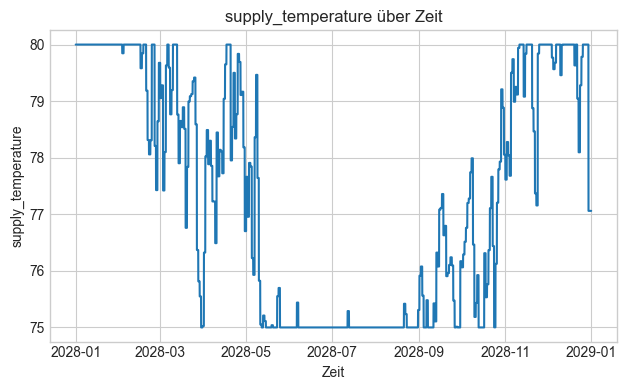

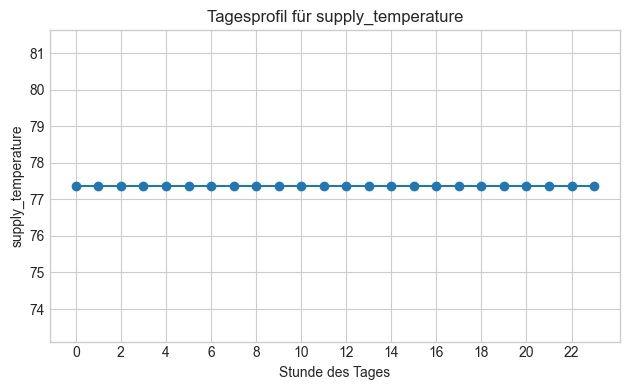


--- Analyse für return_temperature ---


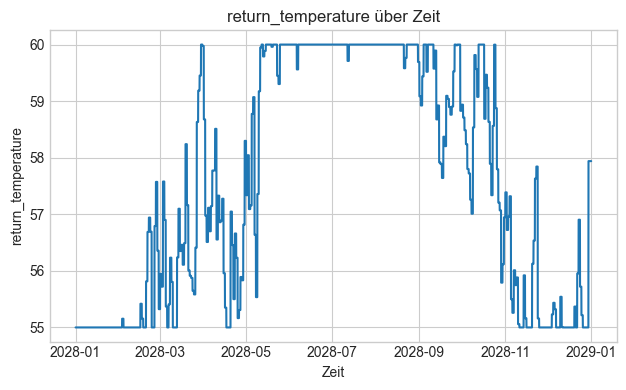

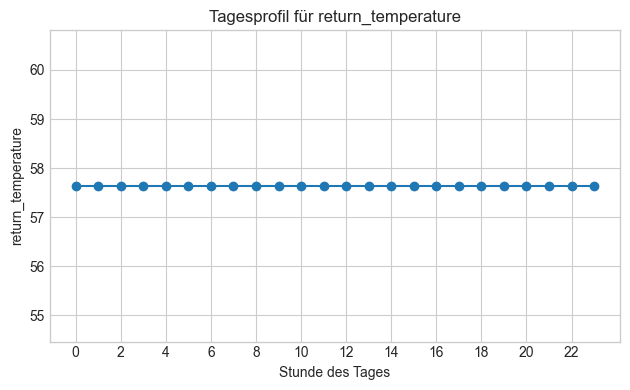


--- Analyse für gas_price ---


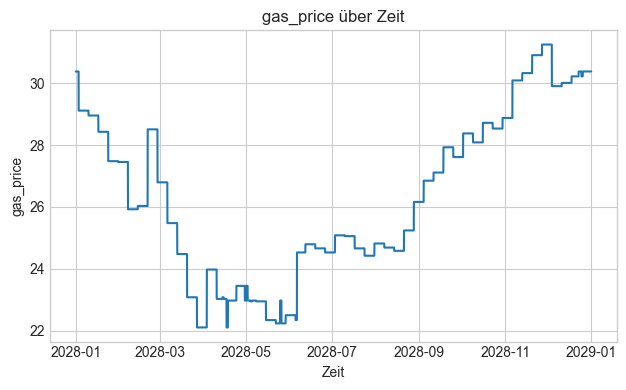

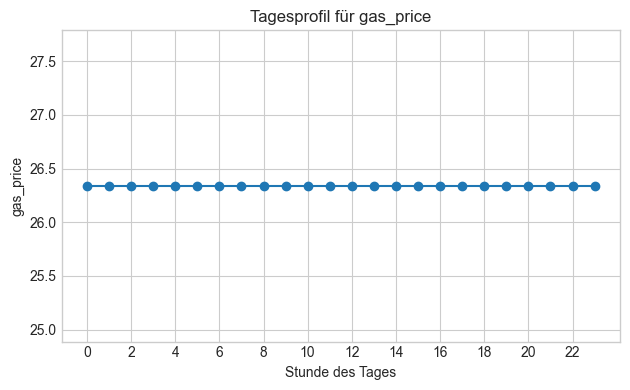


--- Analyse für power_price ---


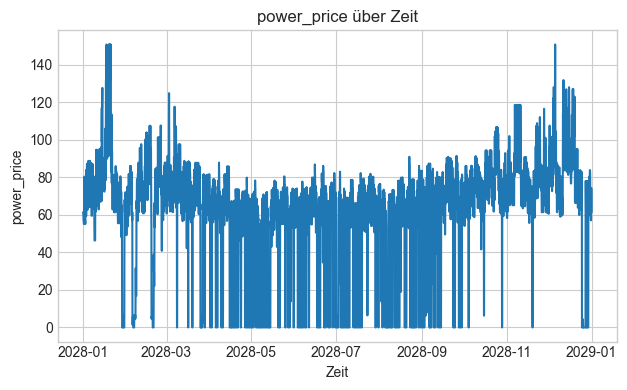

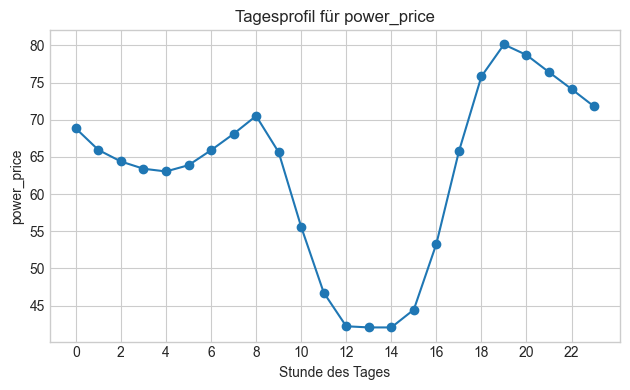

In [7]:
# Plotter initialisieren
plotter = ScenarioPlotter()
comp_plotter = ComparisonPlotter()

# Systematisch die wichtigsten Spalten identifizieren
scenario = collection.scenarios['ue24_ST-max_NW-ext_2028']
numeric_cols = scenario.processed_output.select_dtypes(include=['number']).columns

# Wichtige Spalten definieren (statt hardcoding)
temperature_cols = [col for col in numeric_cols if 'temperature' in col]
power_cols = [col for col in numeric_cols if 'power' in col or '_p' in col]
key_metrics = temperature_cols[:2] + power_cols[:2]  # Erste 2 von jeder Kategorie

print(f"Analysiere folgende Kennzahlen: {key_metrics}")

# Für jede wichtige Metrik systematisch plotten
for col in key_metrics:
    print(f"\n--- Analyse für {col} ---")
    
    # 1. Zeitreihenplot
    fig = plotter.plot_timeseries(scenario, col, 
                                title=f"{col} über Zeit")
    plt.show() 
    
    # 2. Tagesprofil
    fig = plotter.plot_daily_profile(scenario, col,
                                    title=f"Tagesprofil für {col}")
    plt.show()
    
    # 3. Vergleich (falls mehrere Szenarien)
    if len(collection.scenarios) > 1:
        fig = comp_plotter.compare_timeseries(collection.scenarios, col, 
                                            resample='D',
                                            title=f"Vergleich von {col}")
        plt.show()

In [8]:



# Wenn wir eine bestimmte Spalte visualisieren möchten
if 'ue24_ST-max_NW-ext_2028' in collection.scenarios:
    # Beispielspaltennamen - ersetzen Sie durch Ihre tatsächlichen Spalten
    sample_column = collection.scenarios['ue24_ST-max_NW-ext_2028'].processed_output.supply_temperature
    # collection.plot_comparison(sample_column)

# # Um auf ein einzelnes Szenario detailliert zuzugreifen
# if 'ue24_ST-max_NW-ext_2028' in collection.scenarios:
#     scenario = collection.scenarios['ue24_ST-max_NW-ext_2028']
    
#     # Zugriff auf alle Datentypen
#     costs_data = scenario.costs
#     metadata = scenario.metadata
#     output_df = scenario.output
#     processed_df = scenario.processed_output

    
#     # Beispiel: Kostendarstellung
#     if costs_data:
#         plt.figure(figsize=(10, 6))
#         pd.Series(costs_data).plot(kind='bar')
#         plt.title('Kosten für Szenario ' + scenario.scenario_name)
#         plt.ylabel('Wert')
#         plt.tight_layout()
#         plt.show()

## 2. Daten laden

Laden Sie die Simulationsdaten für die verschiedenen Szenarien.

## 3. Datenverarbeitung

Verarbeiten Sie die geladenen Daten für die Analyse.